<b> Nama Kelompok: </b>
1. Christian Lamhot Tua
2. Fellysia Devi Pramono

# K-Means 
Data : make_blobs
- Set 3 main spot (random_state = 42)
- Plot the data using scatter plot
- Determine the optimal number of cluster based on your observation
- Fit k-means and plot the clustering result in scatter plot

## Library

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
x, y = make_blobs(random_state = 42)

## Data Visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


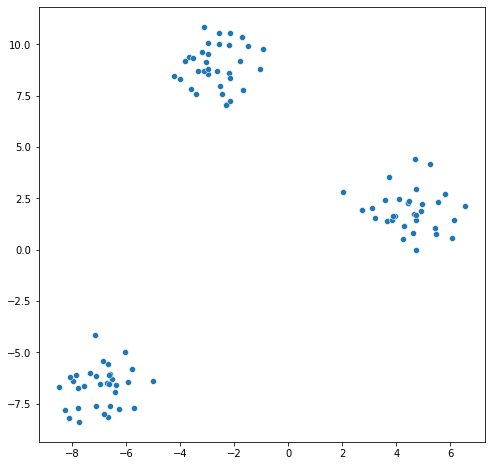

In [3]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x[:, 0], x[:, 1])
plt.show()

## K-Means

In [4]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [5]:
from sklearn.metrics import silhouette_score

label = kmeans.labels_
silhouette_score(x, label, metric = 'euclidean')

0.8469881221532085

In [6]:
kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


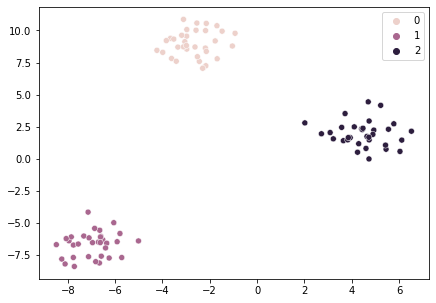

In [7]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x[:, 0], x[:, 1], hue = kmeans.labels_)
plt.show()

<b> Python Exercise: K-Means 1 </b>

Data : ilustrasi k means.csv
- Plot data using scatter plot
- Determine the optimal number of cluster
    - elbow method
    - silhoutte method
- Plot the data and clustering result (optimal number of cluster) using scatter plot

## Library

In [8]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
x = pd.read_csv('ilustrasi k means.csv', sep = ';')
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


## Data Visualization

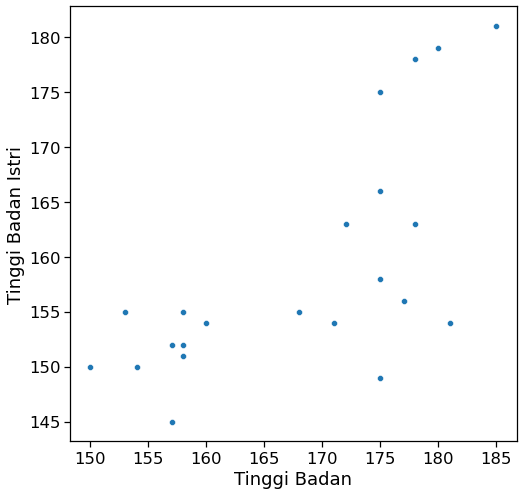

In [48]:
plt.figure(figsize=(8,8))

sns.set_context(context = 'notebook', font_scale = 1.5)
sns.scatterplot(x = 'tinggibadan', y ='tinggibadanistri', data = x)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')
plt.show()

## Elbow Method

In [49]:
def cluster_evaluation(number_of_cluster):
  # clustering variation
  clusterings = [KMeans(n_clusters=k).fit(x) for k in number_of_cluster]
  centroids = [k.cluster_centers_ for k in clusterings]

  # within sumsq
  D_k = [cdist(x, cent, 'euclidean') for cent in centroids] 
  cIdx = [np.argmin(D, axis=1) for D in D_k] 
  dist = [np.min(D, axis=1) for D in D_k] 
  avgWithinSS = [sum(d)/x.shape[0] for d in dist] 

  return avgWithinSS

In [50]:
number_of_clusters = range(2, 11) # 2, 3 ,4 ... 10
avgWithinsq = cluster_evaluation(number_of_clusters)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


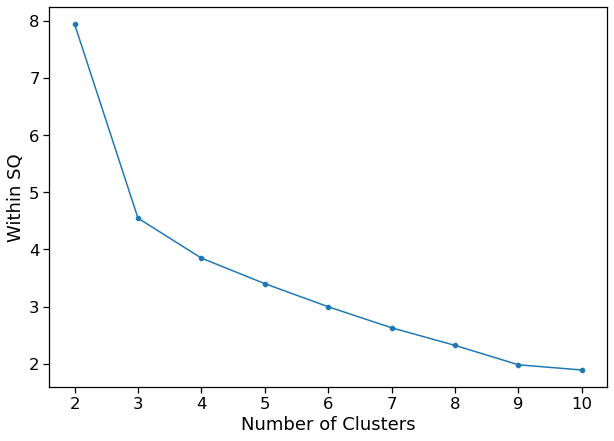

In [51]:
plt.figure(figsize=(10,7))

sns.set_context(context = 'notebook', font_scale = 1.5)

sns.lineplot(number_of_clusters, avgWithinsq)
sns.scatterplot(number_of_clusters, avgWithinsq)

plt.xlabel('Number of Clusters')
plt.ylabel('Within SQ')
plt.show()

## Silhoutte Method

In [52]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [53]:
label = kmeans.labels_

silhouette_score(x, label, metric = 'euclidean')

0.6172319390416597

In [54]:
silhouette_scores = []
number_of_clusters = range(2,11)

for i in number_of_clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(x, labels, metric = 'euclidean'))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


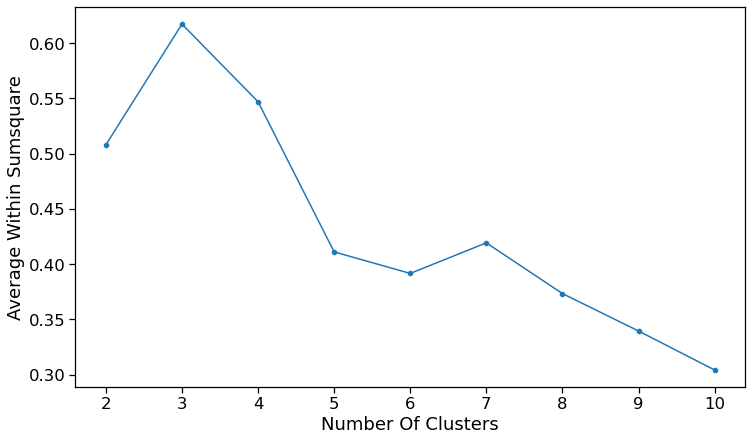

In [55]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, silhouette_scores)
sns.scatterplot(number_of_clusters, silhouette_scores)

plt.xticks(number_of_clusters)

plt.xlabel('Number Of Clusters')
plt.ylabel('Average Within Sumsquare')
plt.show()

## Plot the data and clustering result

In [57]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [58]:
x['clusters'] = kmeans.labels_
x

,tinggibadan,tinggibadanistri,clusters
0,175,175,2
1,178,178,2
2,175,166,0
3,180,179,2
4,185,181,2
5,178,163,0
6,175,158,0
7,181,154,0
8,168,155,0
9,171,154,0


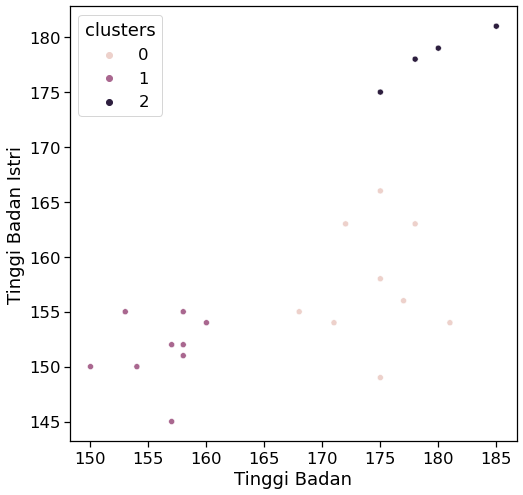

In [59]:
plt.figure(figsize=(8,8))

sns.set_context(context = 'notebook', font_scale = 1.5)
sns.scatterplot(x = 'tinggibadan', y ='tinggibadanistri', hue = 'clusters', data = x)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')
plt.show()